## 역전파 알고리즘

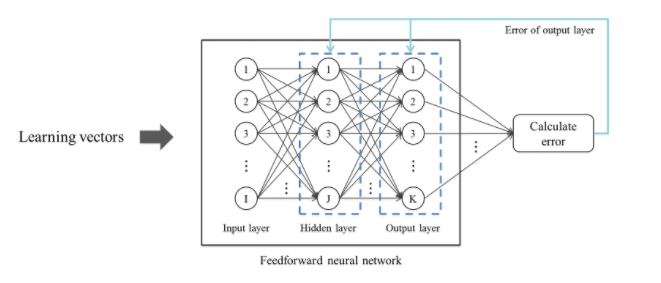

- 출력층의 오차가 역으로 전파된다.


- Supervised Learning
    

- 전파(propagation) 단계
    - 학습 데이터로부터 실제 출력값을 구하고 목적값(정답)과 실제 출력값의 차이인 오차를 계산하여 각층에 대해 역순으로 전달
    - 은닉층에 대한 타겟값을 정해준다.
    

- 가중치 갱신/수정 단계
    - 전파된 오차를 이용하여 가중치를 갱신
    
    
- 은닉층이 포함된 다층 신경망을 학습할 수 있는 알고리즘
    - 역전파 이전에는 은닉층의 목적값(정답)을 결정할 수 없었기 때문에 2층 이상의 신경망을 학습시킬 수 없었음
    - http://untitledtblog.tistory.com/90
    - http://llnntms.tistory.com/31

- 출력층 뉴런의 가중치 변회에 따른 출력증 뉴런의 오차(식 1)

\begin{align}
    \frac{\partial E_n}{\partial v_{kj}} = 
    \frac{\partial E_n}{\partial o_{nk}} \frac{\partial o_{nk}}{\partial {net}_{nk}}
    \frac{\partial net_{nk}}{\partial {v}_{kj}}
\end{align}

- 오차를 모든 각각의 노드에 대해서 미분한 값 > 이 값으로 가중치를 조정
    - 가중치에 의한 에러의 변화량

\begin{align}
    \frac{\partial E_n}{\partial v_{kj}} = 
    \delta_{nk}z_{nj}
\end{align}


- 가중치를 조정하고 싶다. > 그 근거를 찾자 > 오차를 근거 삼아 가중치를 재조정
    - eta는 학습률

\begin{align}
    v_{kj}(t+1) = v_{kj}(t) + \eta\delta_{nk}z_{nj}
\end{align}


- 은닉층의 학습 연산식


\begin{align}
    w_{ji}(t+1) = w_{ji}(t) + \eta x_{ni}z_{nj}(1 - z_{nj})\sum_k^K{\delta_{nk}v_{kj}}
\end{align}

## 5.1 계산 그래프

### 계산 그래프


#### Computation graph


- 계산 과정을 그래프로 나타낸 것
    - 노드(node) : 연산 내용
    - 에지(edge) : 값, 계산 결과
    
    
- 텐서플로우가 이 그래프를 이용한 프로그램 


- 계산 그래프를 이용한 문제 풀이
    - 계산 그래프 구성
    - 그래프에서 계산을 왼쪽에서 오른쪽으로 진행
        - 순전파(forward propagation)
    - 오른쪽에서 왼쪽으로 계산 진행
        - 역전파(backpropagation) : 미분한 결과를 넘길 때도 있다.

### 5.1.1 계산 그래프로 풀다 

#### 문제 1
맹구는 슈퍼에서 1개에 100원인 사과를 2개 샀습니다. 이때 지불 금액을 구하세요. 단, 소비세가 10% 부과됩니다.


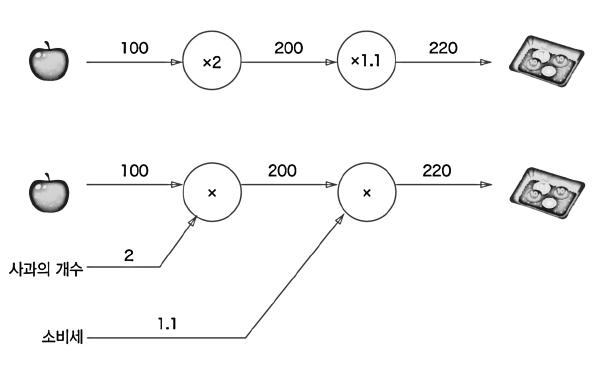

#### 문제 2
맹구는 슈퍼에서 사과를 2개, 귤을 3개 샀습니다. 사과는 1개에 100원, 귤은 1개에 150
원입니다. 소비세가 10%일 때 치를 금액을 구하세요.


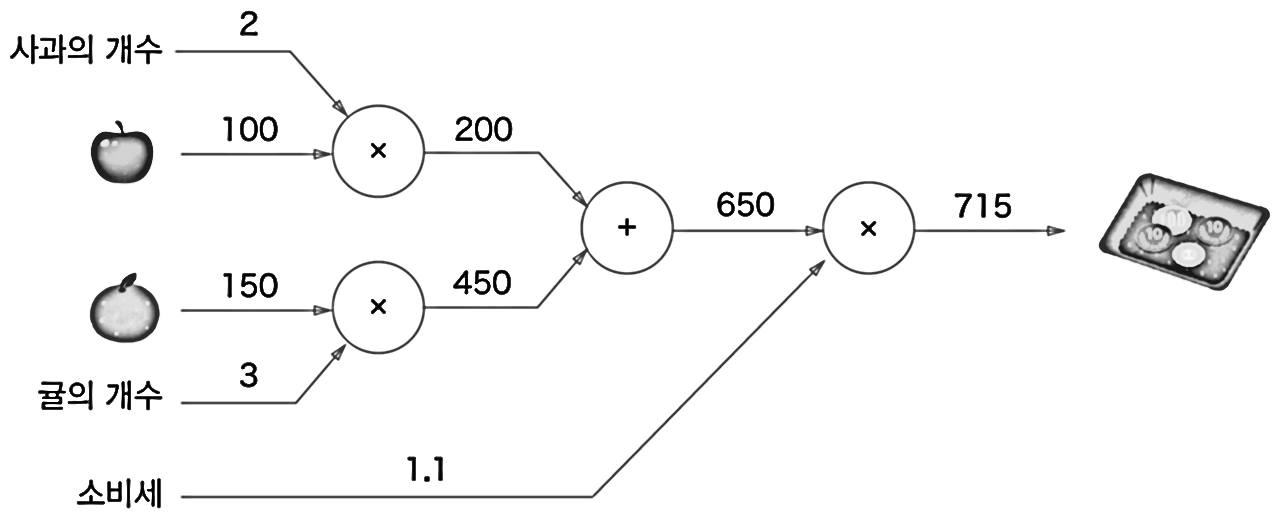

### 5.1.2 국소적 계산

#### 계산 그래프


- 국소적 계산 결과를 전파함으로써 최종 결과를 얻음
    - 전체에서 어떤 일이 벌어지든 상관없이 자신과 관계된 정보만으로 충분
- 국소적(local) : 자신과 직접 관련된 작은 범위


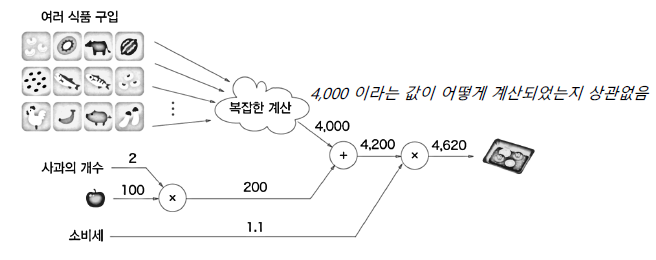

### 5.1.3 왜 계산 그래프인가?

#### 계산 그래프의 이점


- 국소적 계산
- 중간 계산 결과 보관
- **역전파**를 통해 '**미분**'을 효율적으로 계산

#### 역전파에 의한 미분 값의 전달


- '국소적 미분'을 전달


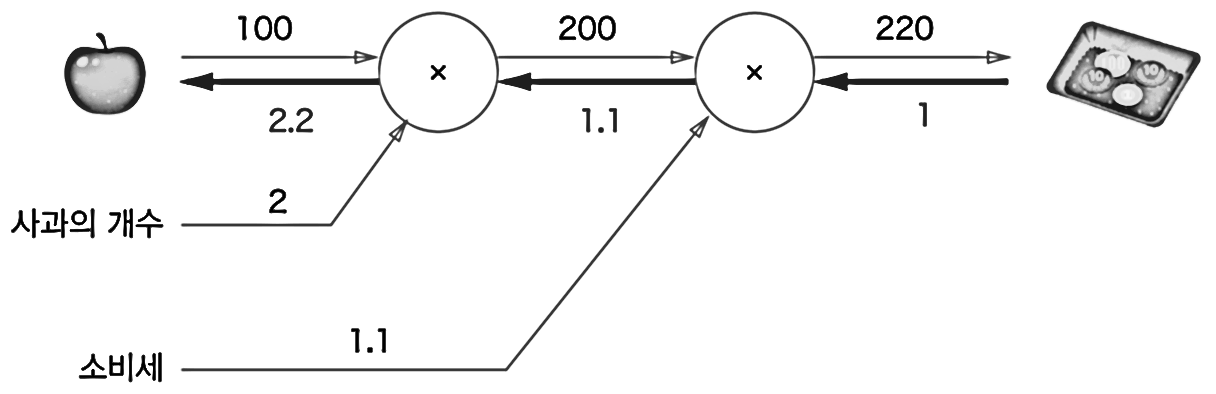


\begin{align}
    \frac{\partial {총금액}}{\partial {사과값}} = 2.2
\end{align}

- 사과가 1원 오르면 -> 총 금액은 2.2원 오른다
    - 사과 값이 아주 조금 오르면 충 금액은 그 아주 작은 값의 2.2배만큼 증가
    - 결과 값에서 1인 이유 : output은 본인 자신을 미분하기 때문에?

## 5.2 연쇄법칙

### 연쇄 법칙(Chain Rule)


- 계산 그래프에서 국소적 미분이 역전파로 전달되는 원리

### 5.2.1 계산 그래프에서의 역전파 

- 순방향과 반대 방향으로 **국소적 미분**을 **곱**한다.


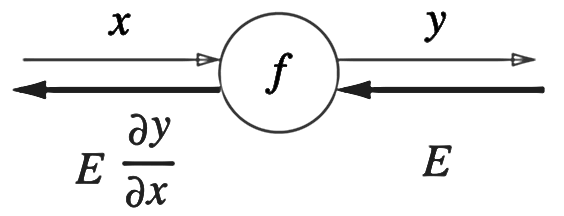

\begin{equation*}
    y = f(x)  [순전파]\\
    y' = f'(x) = \frac{\partial y}{\partial x} [역전파]
\end{equation*}

- 연쇄 법칙에 의해 가능

\begin{equation*}
    \frac{\partial z}{\partial z} = 1 \\
    \frac{\partial z}{\partial t} = \frac{\partial z}{\partial z} \cdot \frac{\partial z}{\partial t} \\
    \frac{\partial z}{\partial x} = \frac{\partial z}{\partial t} \cdot \frac{\partial t}{\partial x}
\end{equation*}

### 5.2.2 연쇄법칙이란? 

#### 합성 함수


- 여러 함수로 구성된 함수


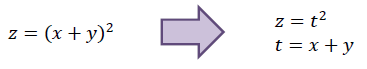

#### 연쇄 법칙


- **합성 함수의 미분**은 합성 함수를 구성하는 **각 함수의 미분의 곱**으로 나타낼 수 있다.

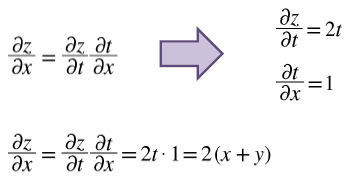

- z에 대한 x의 편미분 : z에 대한 x의 변화량

### 5.2.3 연쇄법칙과 계산 그래프 

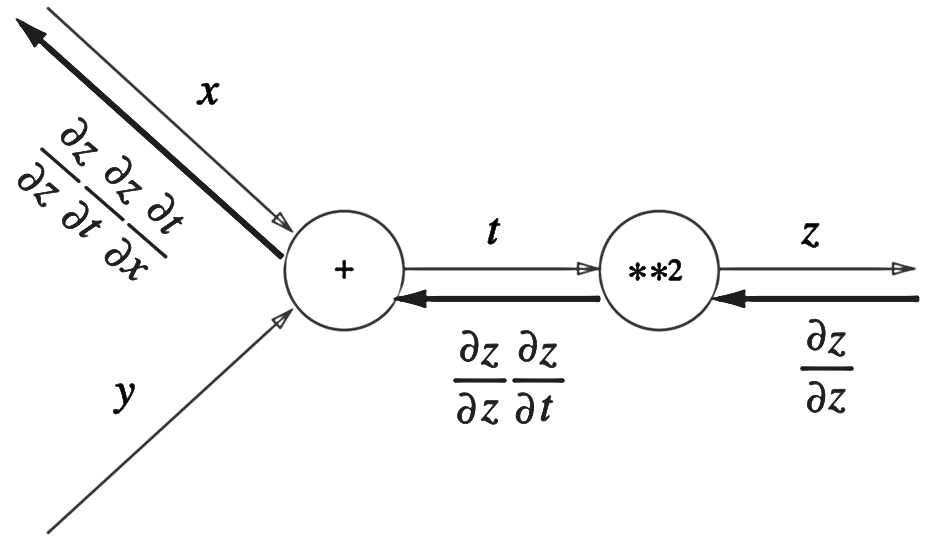

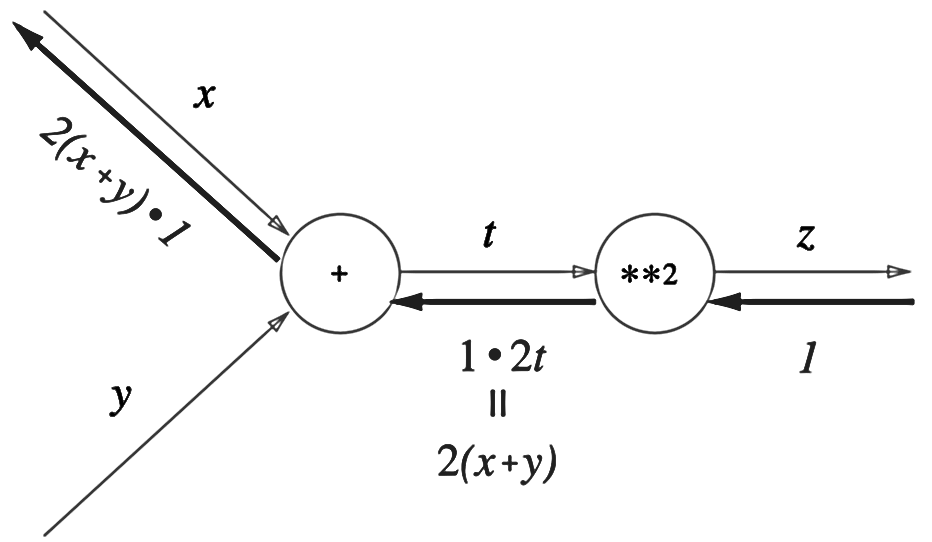

\begin{equation*}
   z = f(t) = f(g(x, y)) \\
   = t^2 = {(x + y)}^{2}
\end{equation*}

\begin{equation*}
   \frac{\partial z}{\partial x} = \frac{\partial z}{\partial t} \frac{\partial t}{\partial x} \\
   = \frac{\delta}{\delta x}f(g(x, y)) \\
   = \frac{\delta}{\delta x}f(x) \cdot  \frac{\partial t}{\partial x}g(x, y) \\
   = 2t \cdot 1 \\ 
   = 2(x + y)
\end{equation*}

\begin{equation*}
    \frac{\partial z}{\partial z} = 1 \\
    \frac{\partial z}{\partial t} = \frac{\partial z}{\partial z} \cdot \frac{\partial z}{\partial t} = 2t \cdot 1 \\
    \frac{\partial z}{\partial x} = \frac{\partial z}{\partial z} \cdot \frac{\partial z}{\partial t} \cdot \frac{\partial t}{\partial t}= 1 \cdot 2t \cdot 1 
\end{equation*}

## 5.3 역전파

### 5.3.1 덧셈 노드의 역전파 

- 역전파된 미분값을 왼쪽으로 **그대로 전달**


- $z = x + y$의 미분


\begin{equation*}
    \frac{\partial z}{\partial x} = 1 \\
    \frac{\partial z}{\partial y} = 1 
\end{equation*}


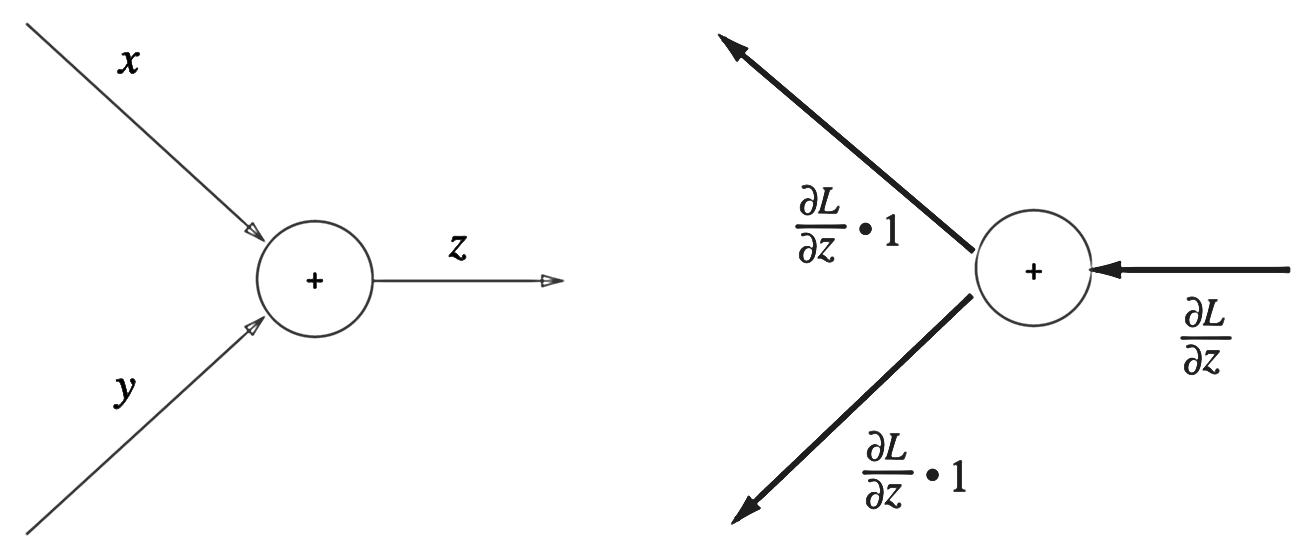


- 다른 미지수가 추가되는 경우 매개변수가 2개로 유지되도록 새로 노드와 에지를 추가해준다


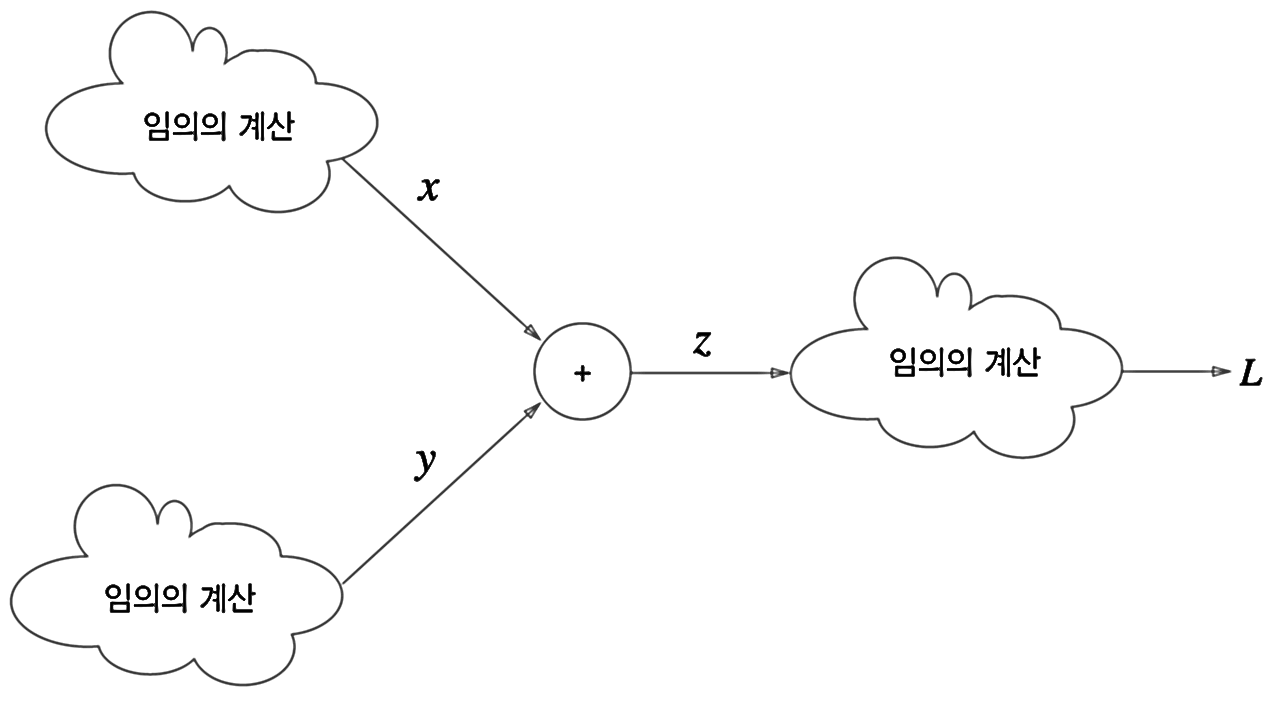

#### 덧셈 노드 역전파의 구체적 예


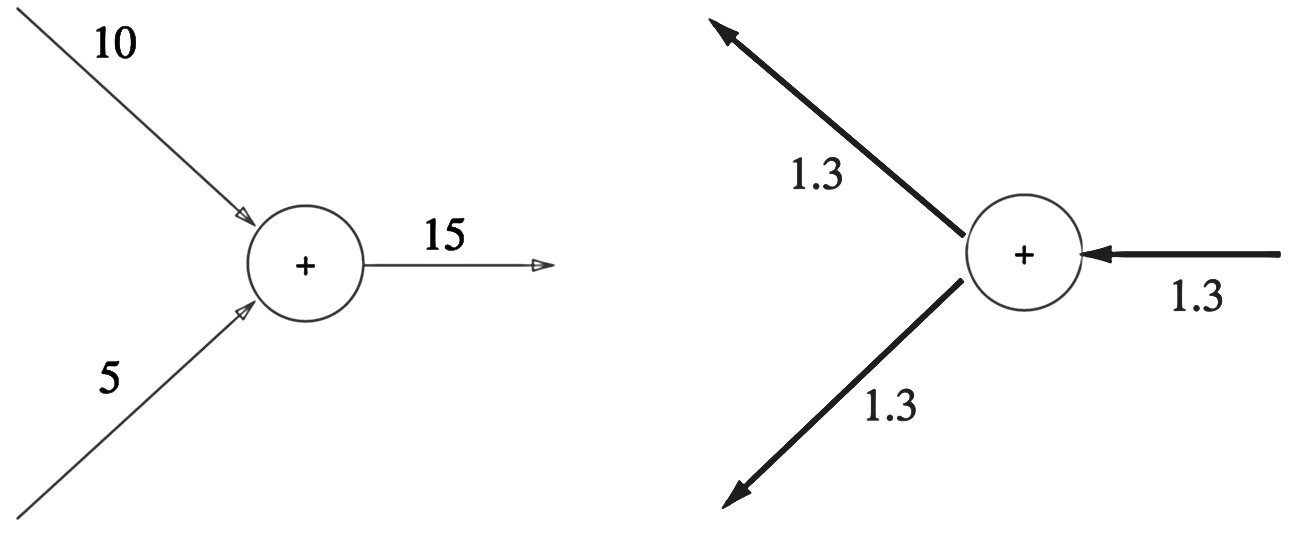


- $\partial t$만큼 변화를 한다면 최종 결과는 1.3$\partial t$만큼 변한다

### 5.3.2 곱셈 노드의 역전파 

- 역전파된 미분값에 순전파 때의 **입력 신호를 서로 바꾼 값**을 **곱**해서 왼쪽으로 전달


- - $z = xy$의 미분


\begin{equation*}
    \frac{\partial z}{\partial x} = y \\
    \frac{\partial z}{\partial y} = x 
\end{equation*}


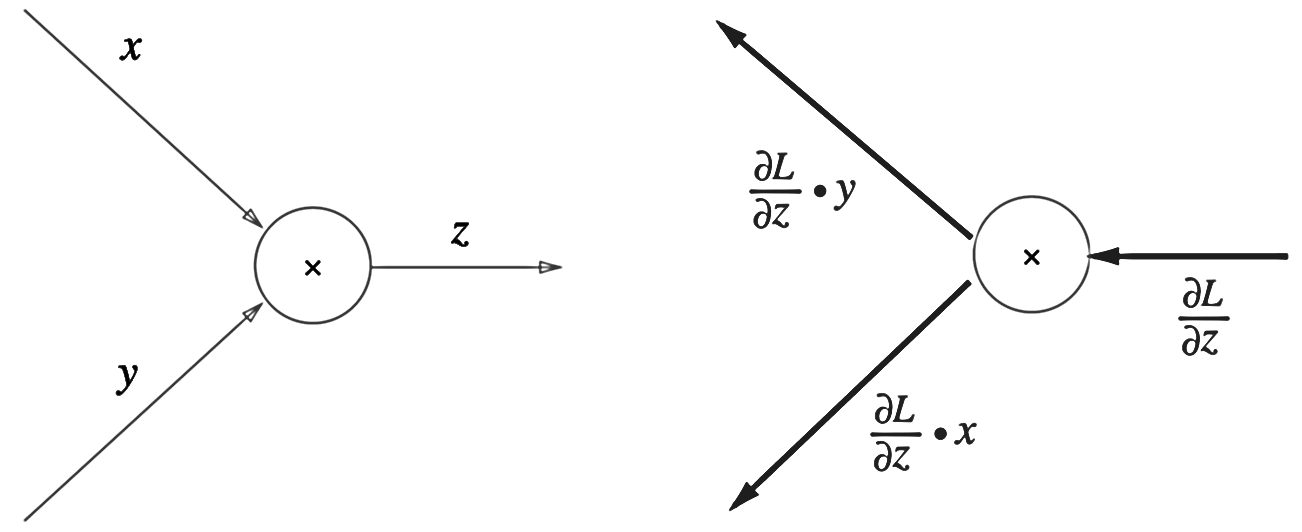

#### 곱셈 노드 역전파의 구체적 예


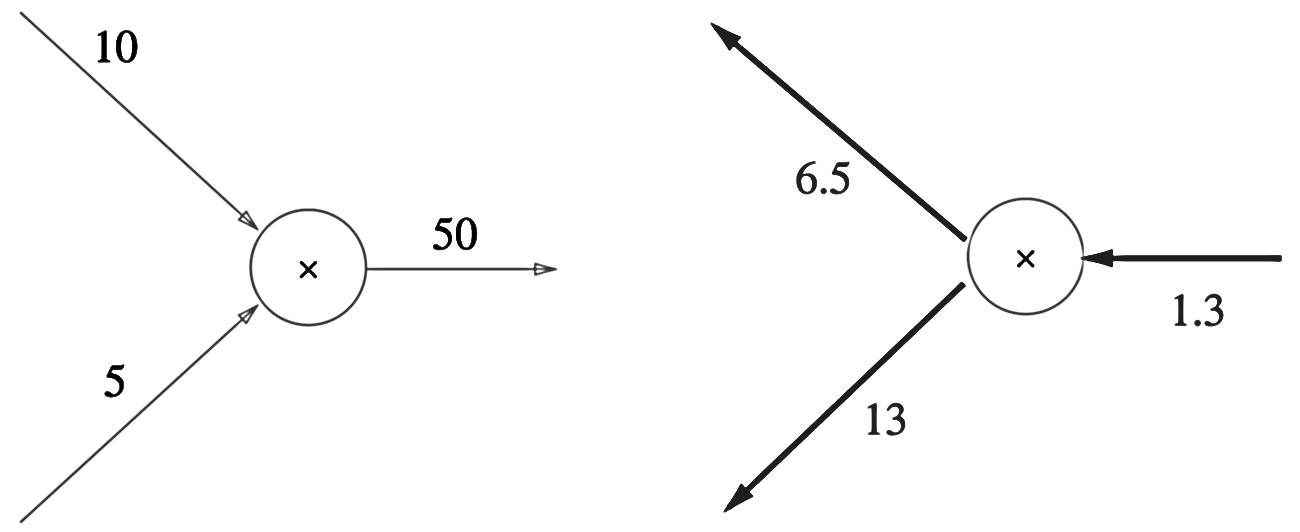


- 누적 변화량

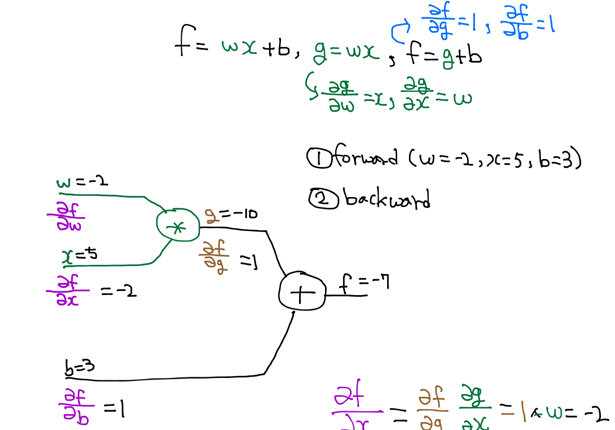

### 5.3.3 사과 쇼핑의 예 

#### 사과 쇼핑의 역전파 예
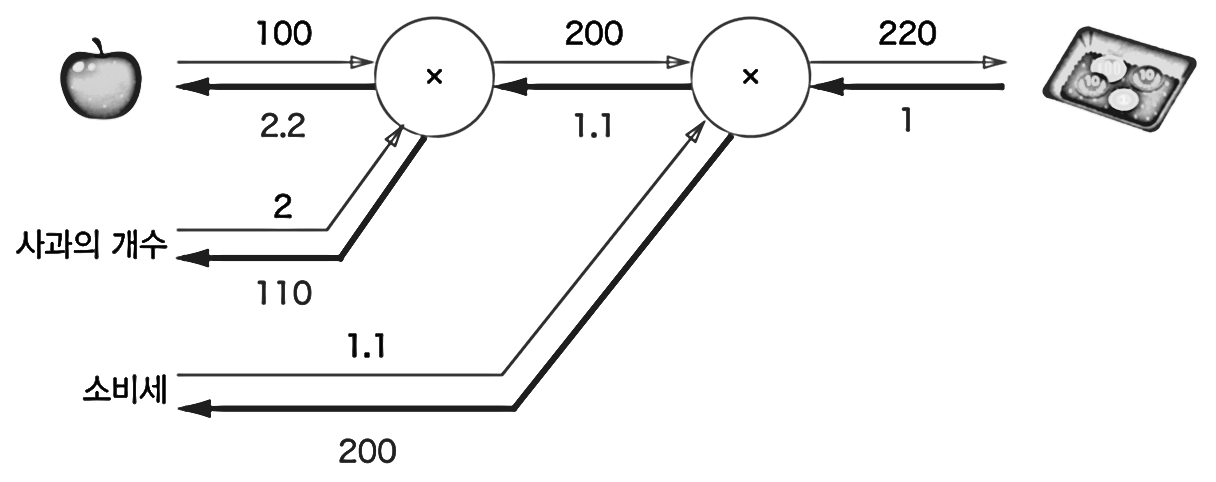

#### 사과의 가격이 총 금액에 어떤 영향을 주는가?


- 사과 가격에 대한 지불 금액의 미분


\begin{equation*}
    \frac{\partial P}{\partial P} = 1 \\
    \frac{\partial P}{\partial z} = \frac{\partial P}{\partial P} \cdot \frac{\partial P}{\partial z} = 1 \cdot 1.1 = 1.1\\ 
    \frac{\partial P}{\partial x} = \frac{\partial P}{\partial P} \cdot \frac{\partial P}{\partial z} \cdot \frac{\partial z}{\partial x} = 1 \cdot 1.1 \cdot 2 = 2.2\\ 
\end{equation*}

#### 사과 개수에 대한 지불 금액의 미분


\begin{equation*}
    \frac{\partial P}{\partial P} = 1 \\
    \frac{\partial P}{\partial z} = \frac{\partial P}{\partial P} \cdot \frac{\partial P}{\partial z} = 1 \cdot 1.1 = 1.1\\ 
    \frac{\partial P}{\partial x} = \frac{\partial P}{\partial P} \cdot \frac{\partial P}{\partial z} \cdot \frac{\partial z}{\partial x} = 1 \cdot 1.1 \cdot 100 = 110\\ 
\end{equation*}

#### 소비세에 대한 지불 금액의 미분


\begin{equation*}
    \frac{\partial P}{\partial P} = 1 \\
    \frac{\partial P}{\partial z} = \frac{\partial P}{\partial P} \cdot \frac{\partial P}{\partial z} = 1 \cdot 200 = 200\\ 
\end{equation*}

#### 사과와 귤 쇼핑의 역전파 예


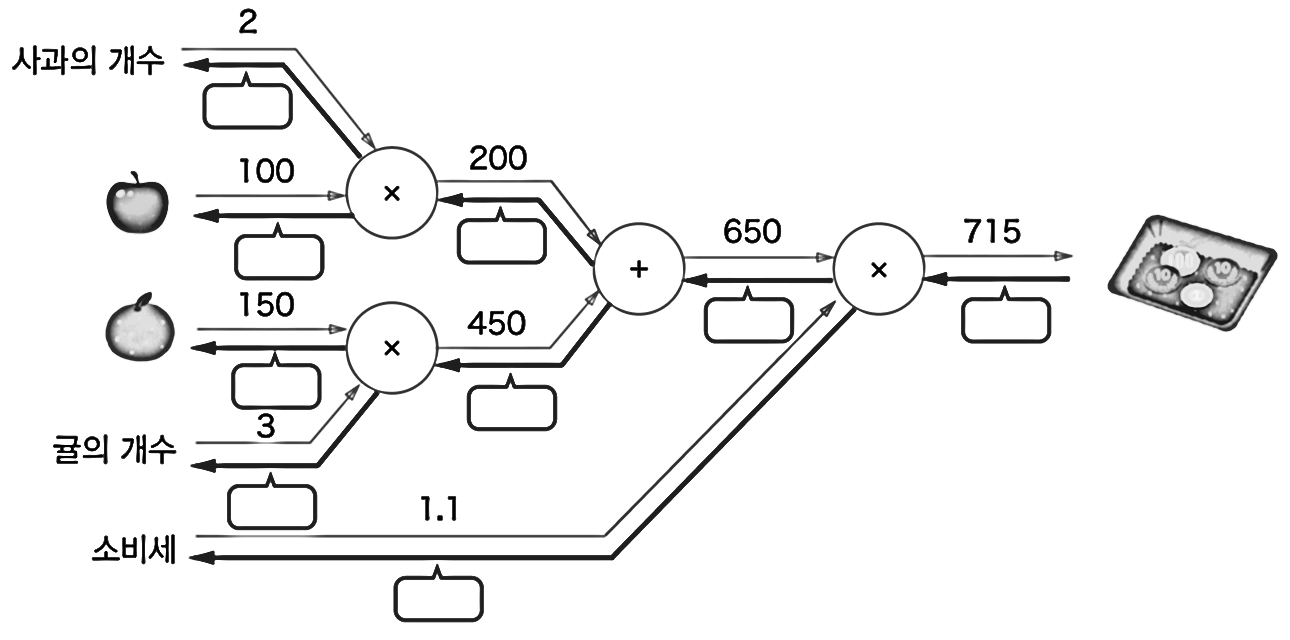

## 5.4 단순한 계층 구현하기

### 5.4.1 곱셈 계층 

#### 곱셈 노드


- MulLayer 클래스 (CH05/layer_naive.py)
    - 역전파 떄 사용하기 위해 순전파 입력시 입력값을 저장
- 순전파, 역전파 (CH05/buy_apple.py)


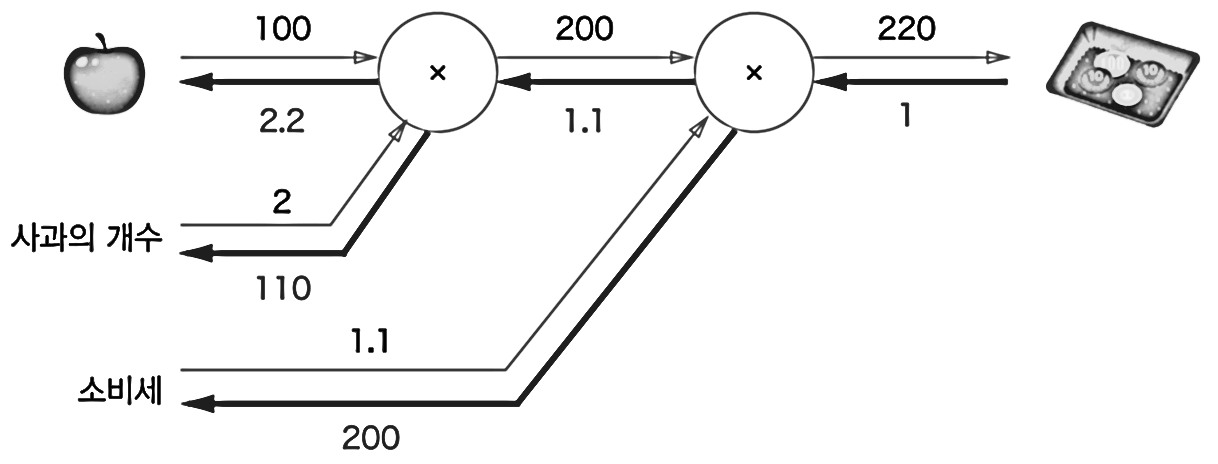

In [1]:
pwd

'C:\\pydev\\deep-learning-from-scratch-master\\deep-learning-from-scratch-master'

In [2]:
%cd CH05

C:\pydev\deep-learning-from-scratch-master\deep-learning-from-scratch-master\CH05


In [3]:
import numpy as np
from layer_naive import *

In [4]:
apple_price = 100
apple_num = 2
tax = 1.1

In [5]:
# 계산식 구성, 노드 준비
mul_apple_node = MulLayer()
mul_tax_node = MulLayer()

In [6]:
# 순전파
apple_total_price = mul_apple_node.forward(apple_price, apple_num)
total_price = mul_tax_node.forward(apple_total_price, tax)

In [7]:
print(total_price)

220.00000000000003


In [8]:
# 역전파
d_total_price = 1
d_apple_total_price, d_tax = mul_tax_node.backward(d_total_price) 
d_apple_price, d_apple_num = mul_apple_node.backward(d_apple_total_price)

In [9]:
print('총 지불 금액에 대한 사과 개수의 미분 : ', d_apple_num)
print('총 지불 금액에 대한 사과 가격의 미분 : ', d_apple_price)
print('총 지불 금액에 대한 소비자 세의 미분 : ', d_tax)

총 지불 금액에 대한 사과 개수의 미분 :  110.00000000000001
총 지불 금액에 대한 사과 가격의 미분 :  2.2
총 지불 금액에 대한 소비자 세의 미분 :  200


### 5.4.2 덧셈 계층 

#### 덧셈 노드


- AddLayer 클래스 (ch05/layer_naive.py)
     - 미분을 그대로 전파하므로 입력을 별도로 저장할 필요 없음
- 순전파, 역전파 (ch05/buy_apple_orange.py)

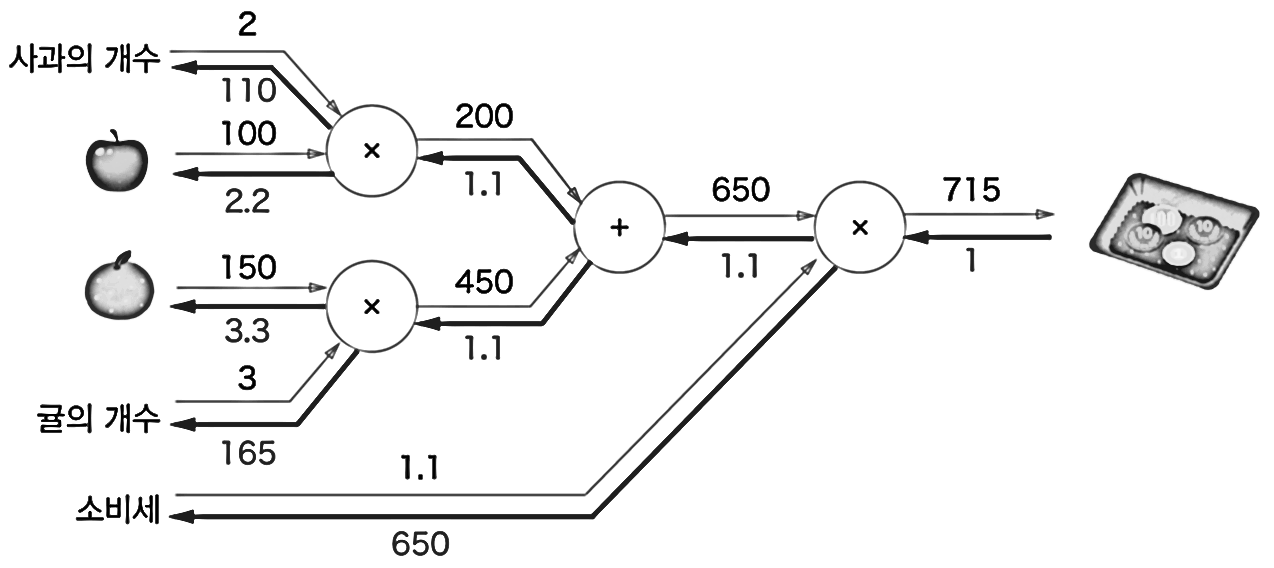

In [10]:
import numpy as np
from layer_naive import *

In [11]:
apple_price = 100
apple_num = 2
orange_price = 150
orange_num = 3
tax = 1.1

In [12]:
# 계산식 구성, 노드 준비
mul_apple_total_price = MulLayer()
mul_orange_total_price = MulLayer()
add_apple_orange_price = AddLayer()
mul_tax = MulLayer()

In [13]:
# 순전파 : 총 지불 금액 계선
apple_total_price = mul_apple_total_price.forward(apple_price, apple_num)
orange_total_price = mul_orange_total_price.forward(orange_price, orange_num)
apple_orange_price = add_apple_orange_price.forward(apple_total_price, orange_total_price)
total_price = mul_tax.forward(apple_orange_price, tax)

In [14]:
print('사과의 총 가격 : ', apple_total_price)
print('오렌지의 총 가격 : ', orange_total_price)
print('사과와 오렌지 총 가격 : ', apple_orange_price)
print('전체 금액 : ',total_price)

사과의 총 가격 :  200
오렌지의 총 가격 :  450
사과와 오렌지 총 가격 :  650
전체 금액 :  715.0000000000001


In [15]:
# 역전파
d_total_price = 1
d_apple_orange_price, d_tax = mul_tax.backward(d_total_price) 
d_apple_total_price, d_orange_total_price = add_apple_orange_price.backward(d_apple_orange_price)
d_apple_price, d_apple_num = mul_apple_total_price.backward(d_apple_total_price)
d_orange_price, d_orange_num = mul_orange_total_price.backward(d_orange_total_price)

In [16]:
print('총 지불 금액에 대한 사과 개수의 미분 : ', d_apple_num)
print('총 지불 금액에 대한 사과 가격의 미분 : ', d_apple_price)
print('총 지불 금액에 대한 오렌지 가격의 미분 : ', d_orange_price)
print('총 지불 금액에 대한 오렌지 개수의 미분 : ', d_orange_num)
print('총 지불 금액에 대한 소비자 세의 미분 : ', d_tax)

총 지불 금액에 대한 사과 개수의 미분 :  110.00000000000001
총 지불 금액에 대한 사과 가격의 미분 :  2.2
총 지불 금액에 대한 오렌지 가격의 미분 :  3.3000000000000003
총 지불 금액에 대한 오렌지 개수의 미분 :  165.0
총 지불 금액에 대한 소비자 세의 미분 :  650


## 5.5 활성화 함수 계층 구현하기 

### 5.5.1 ReLU 계층 

- common/layers.py

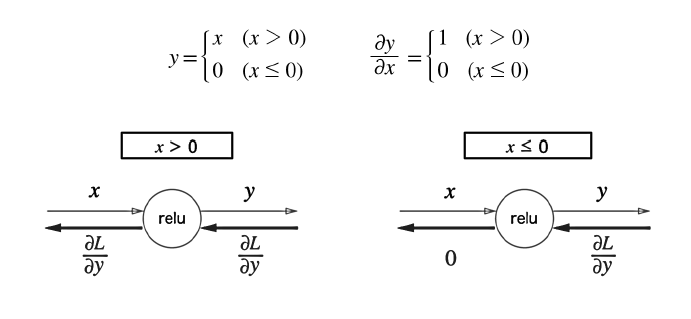


- 입력값이 양수인지 음수인지에 따라 값이 나뉘는 함수

### 5.5.2 Sigmoid 계층 

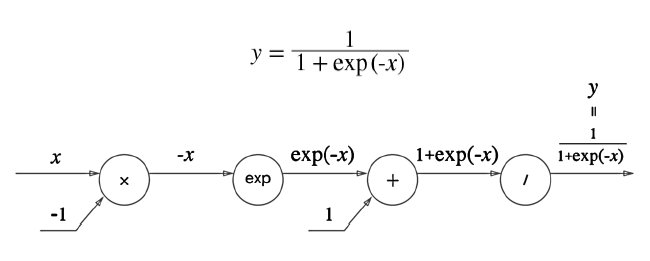

#### 1단계 : / 노드


\begin{equation*}
    y = \frac{1}{1+exp(-x)} = \frac{1}{X}
\end{equation*}


\begin{equation*}
    \frac{\partial y}{\partial X} = -\frac{1}{X
    ^2} = -y^2 
\end{equation*}


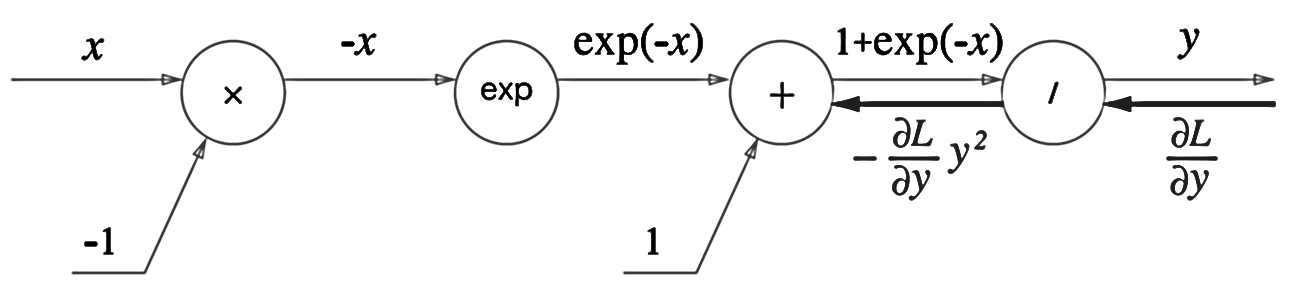

#### 2단계 : + 노드
- 상류의 값을 여과 없이 하류로


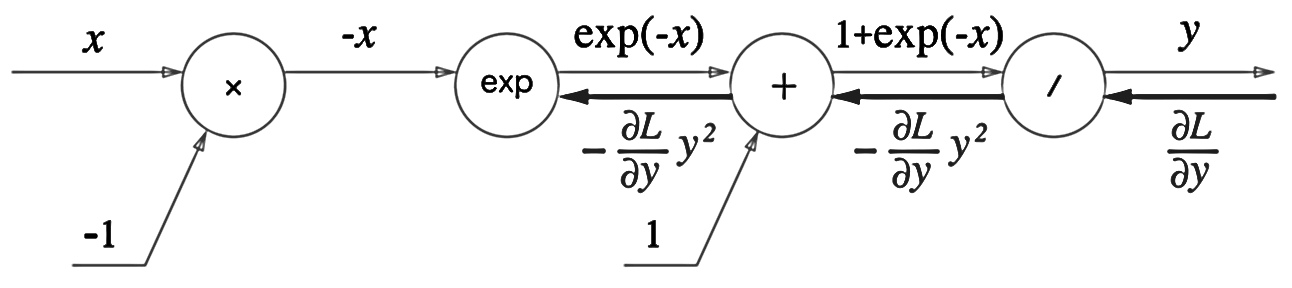

#### 3단계 : $exp$ 노드


\begin{equation*}
    \frac{\partial y}{\partial} = exp(x)
\end{equation*}


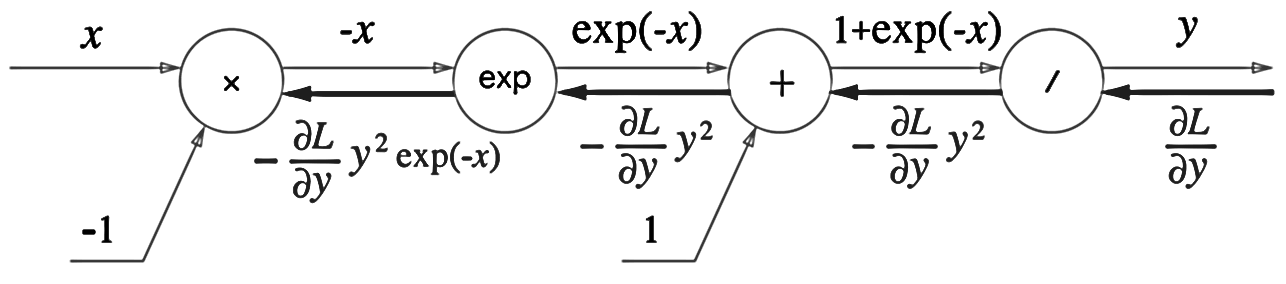

#### 4단계 : x 노드
- 순전파 때의 값을 서로 바꿔 곱


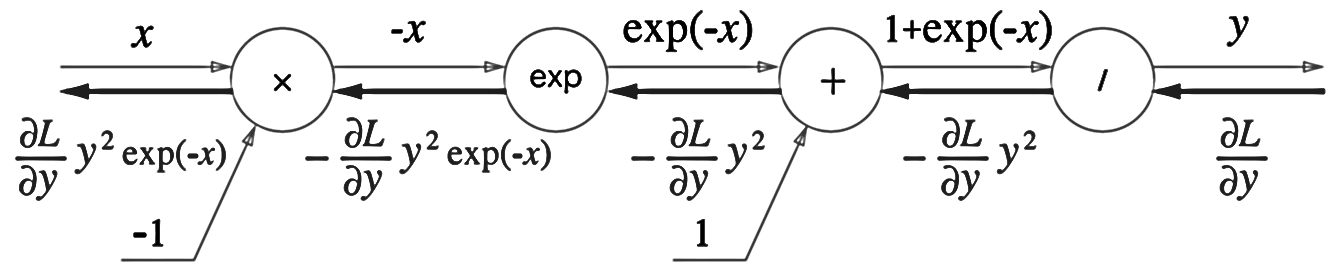

#### 간소화 버전


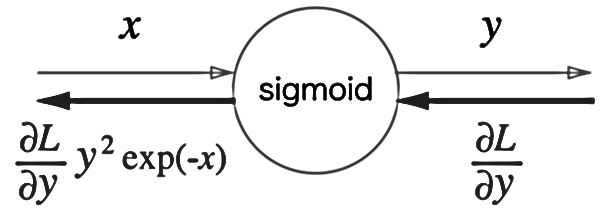

- $\frac{\partial L}{\partial y} y^2 e^{-x}$를 다음과 같이 정리
    - 순전파의 출력만으로 계산


\begin{equation*}
    y = \frac{1}{(1+exp(x))}
\end{equation*}


\begin{equation*}
    \frac{\partial L}{\partial y} y^2 {exp}^{-x} = \frac{\partial L}{\partial y} \frac{1}{{(1 + exp(-x))}^{2}} exp(-x) \\
    = \frac{\partial L}{\partial y} \frac{1}{1 + exp(-x)} \frac{exp(-x)}{1 + exp(-x)} \\
    = \frac{\partial L}{\partial y} \frac{1}{1 + exp(-x)} \frac{1+ exp(-x) -1}{1 + exp(-x)} \\
    = \frac{\partial L}{\partial y} y(1 - y)
\end{equation*}

#### 최종 간소화 버전


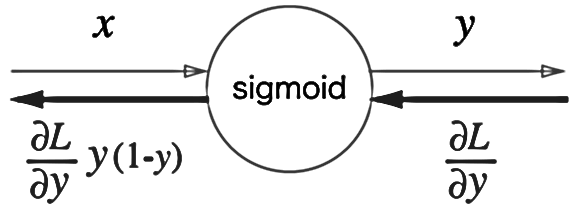

## 5.6 Affine/Softmax 계층 구현하기

### 5.6.1 Affine 계층 

- Affine = fully connected
- Affine Transformation을 수행하는 신경만 계층(레이어)
    - 어파인 변환 : 신경망의 순전파 때 수행하는 행렬의 내적을 기하학에서 일컫는 표현
    

- 신경망의 순전파 시 노드(뉴런)의 가중치 입력을 계산하기 위해 행렬의 내적 사용


- 이를 같은 신경망 계층의 모든 노드에 대해 표현하기 위해 입력의 행렬과 기중치 행렬을 정의
- 모든 노드의 가중치 입력을 계산하기 위해 입력의 행렬과 가중치 행렬에 대해 행렬 내적 수행


- 은닉층, 출력층 어디든 적용 가능

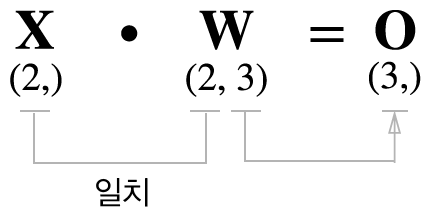

#### Y = np.dot(X, W) + B를 계산 그래프로 표현


- $\mathbf{X}, \mathbf{W}, \mathbf{B}$가 행렬(다차원 배열)임에 주의
    - 지금까지의 계산 그래프는 노드 사이에 '스칼라 값'이 흘렀지만
    - 어파인 계층에서는 '행렬'이 흐른다.
    
    
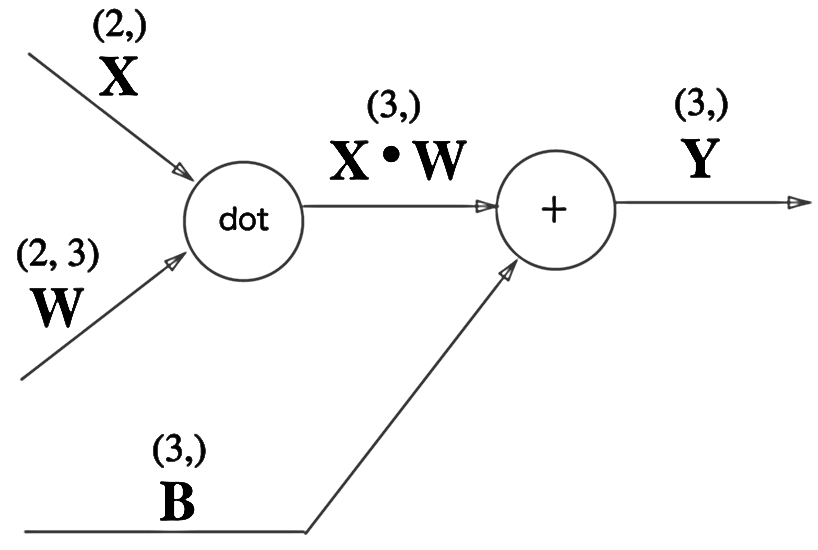    

#### 행렬 내적에 대한 역전파


\begin{equation*}
    \frac{\partial L}{\partial \mathbf{X}} = \frac{\partial L}{\partial \mathbf{Y}} \cdot \mathbf{W^{-T}} \\
    \frac{\partial L}{\partial \mathbf{W}} = \mathbf{X^{-T}} \cdot \frac{\partial L}{\partial \mathbf{W}} \\
\end{equation*}


\begin{equation*}
    \mathbf{W} = \begin{vmatrix}
    w_{11} & w_{21} & w_{31} \\
    w_{12} & w_{22} & w_{32}
    \end{vmatrix}
\end{equation*}


\begin{equation*}
    \mathbf{W^{T}} = \begin{vmatrix}
    w_{11} & w_{12} \\
    w_{21} & w_{22} \\
    w_{31} & w_{32}
    \end{vmatrix}
\end{equation*}

#### Affine 계층의 역전파


- 행렬의 형상을 주의 깊게 살펴보기

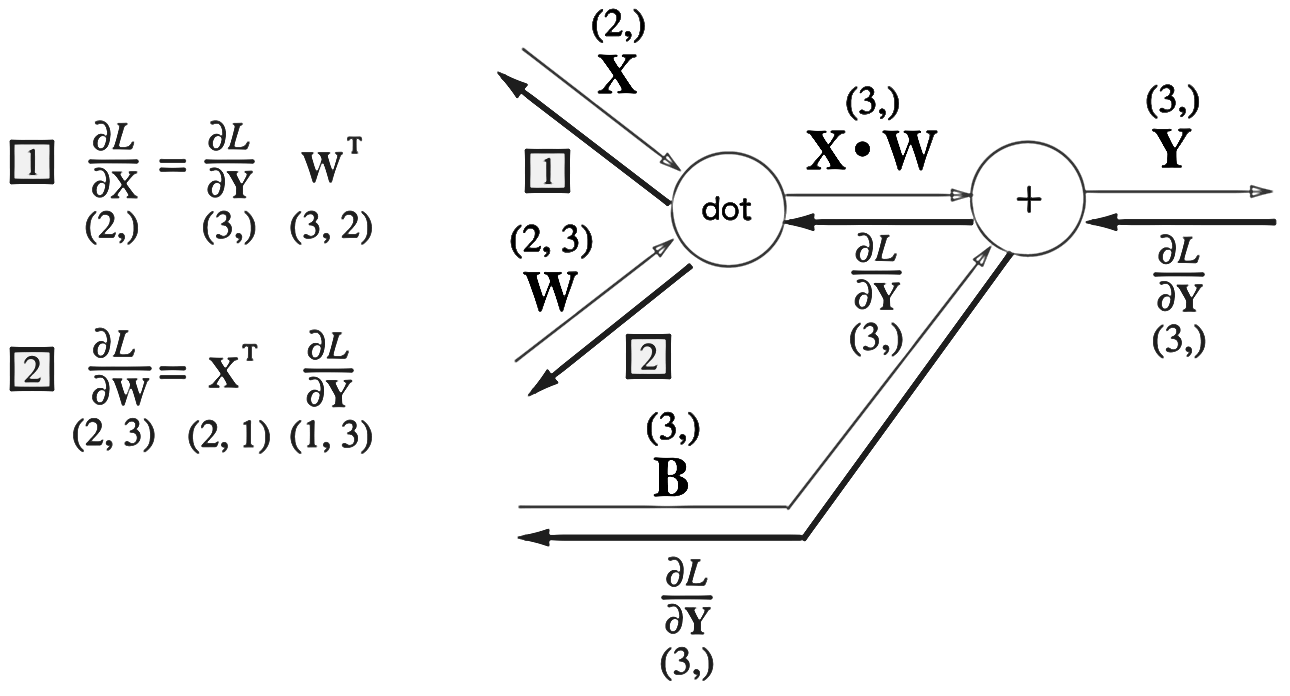

\begin{equation*}
    X = (x_0, x_1, x_2, x_3, ..., x_n) \\
\end{equation*}

\begin{equation*}
    \frac{\partial L}{\partial X} = (\frac{\partial L}{\partial x_0}, \frac{\partial L}{\partial x_1}, \frac{\partial L}{\partial x_2}, ..., \frac{\partial L}{\partial x_n})
\end{equation*}


- $\mathbf{X}$와 $\frac{\partial L}{\partial \mathbf{X}}$의 형상이 같음에 주의

### 5.6.2 배치용 Affine 계층 

- 지금까지는 입력 데이터 한 건만 고려
- 입력 데이터 N개를 묶에서 배치 처리하는 경우 고려

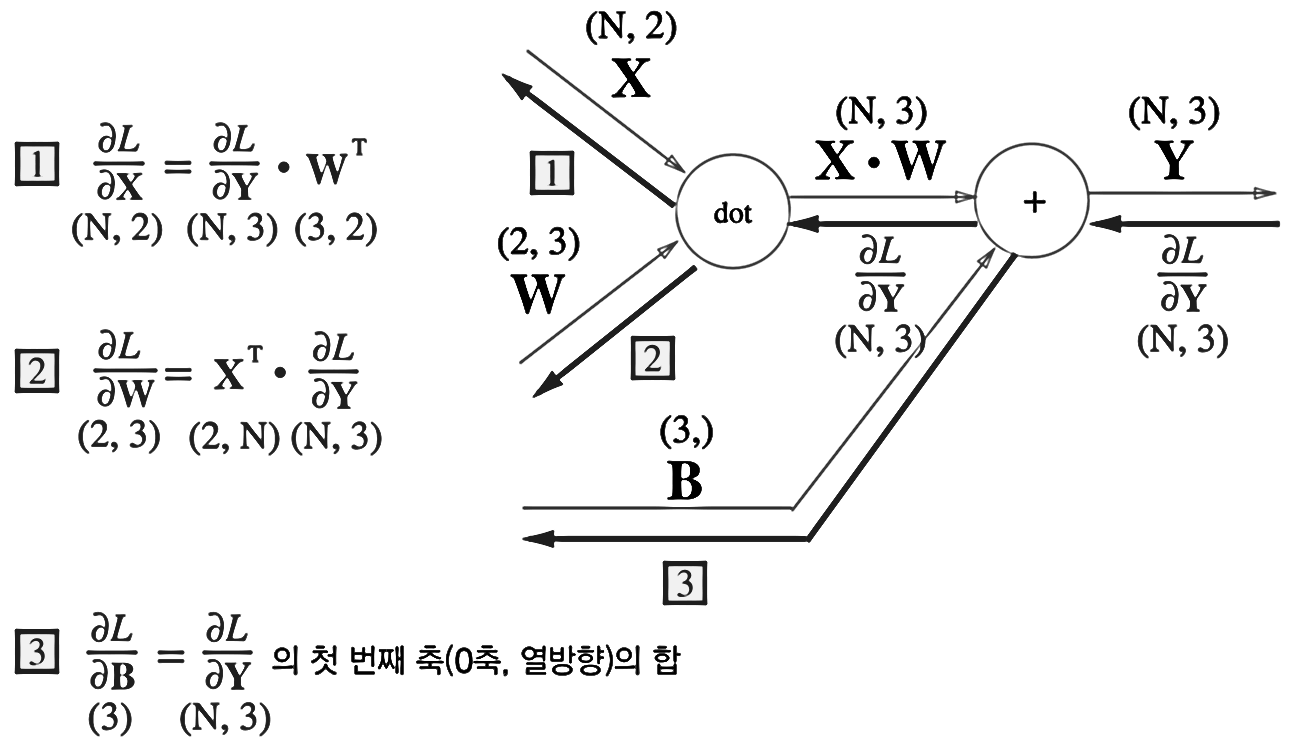

### 5.6.3 Softmax-with-Loss 계층 

#### 소프트맥스 함수에 손실 함수인 교차 엔트로피 오차도 포함


- 출력층에 사용

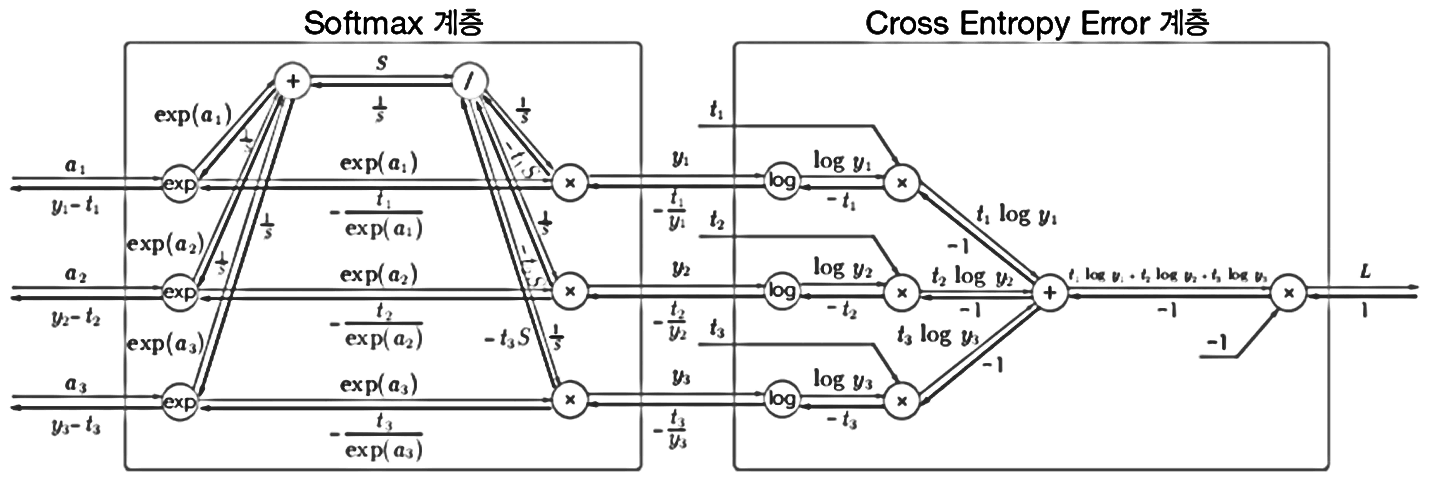

- Softmax : $y_{k} = \frac{{exp}(a_{k})}{\sum_{i = 1}^{n}{exp}(a_{i})}$
- Cross Entropy Error : $E = -\sum_{k}t_{k}log{y_{k}}$

#### 간략화 버전


- 소프트맥스의 역전파 결과가 깔끔한 것에 유의
    - 소프트맥스의 손실 함수로 교차 엔트로피 오자를 적용하였기 떄문
    - 회귀 문제라면 출력의 활성화 함수로 ‘항등 함수’, 손실 함수로 ‘평균 제곱 오차’를 사용하면 역시 깔끔한 결과를 얻을 수 있음

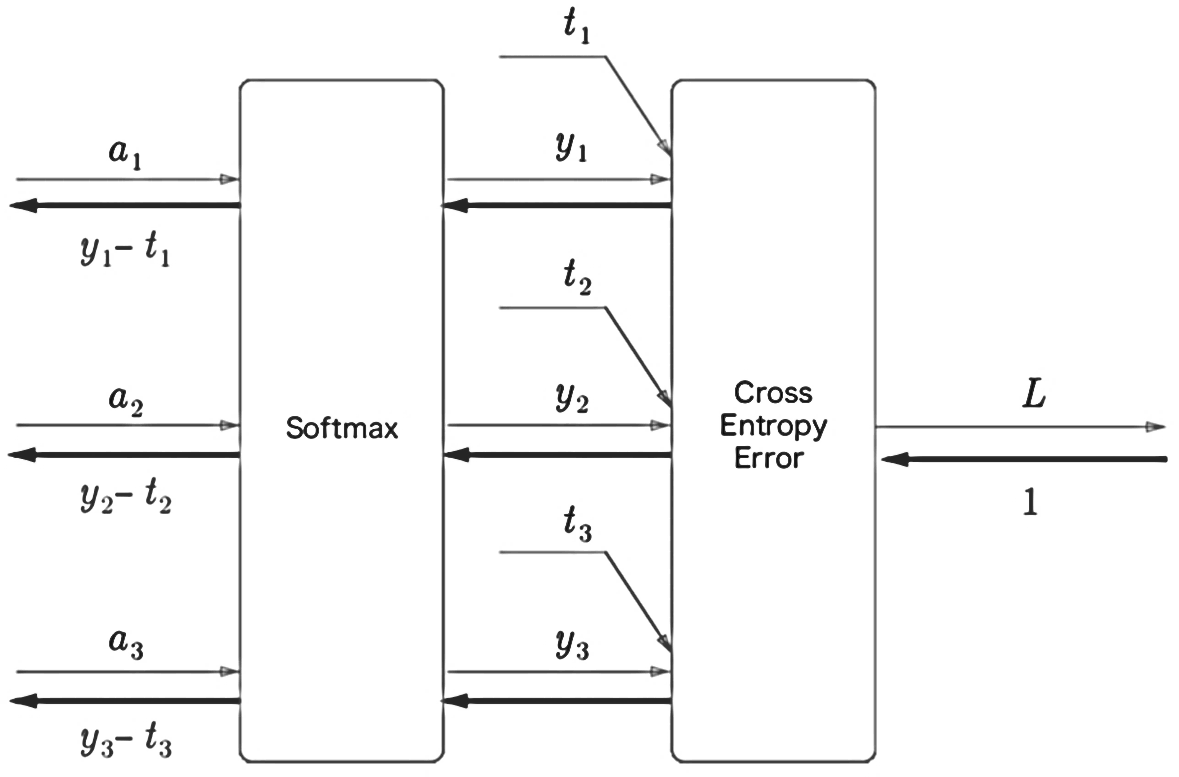

## 5.7 오차역전파법 구현하기 

### 5.7.1 신경망 학습의 전체 그림 

- 전제
    - 신경망에는 적응 가능한 가중치와 편향(바이어스)이 있고, 이 가중치와 바이어스를 훈련 데이터에 적응하도록 조정하는 과정을 ‘학습’이라 한다. 신경망 학습은 다음과 같이 4단계로 수행한다.


1. 미니 배치
    - 훈련 데이터 중 일부를 무작위로 가져온다.
    - 이렇게 선별된 데이터를 미니 배치라 하며, 이 미니 배치의 손실 함수 값을 줄이는 것이 목표다.
2. 기울기 산출
    - 미니 배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다.
    - 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.
3. 매개변수 갱신
    - 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.
4. 1~3 단계 반복

### 5.7.2 오차역전파법을 적용한 신경망 구현하기

#### ch05/two_layer_net.py


- 신경망 계층을 OrderedDict에 보관하는 점 중요
    - 순서가 있는 딕셔너리
    - 순전파: 추가한 순서대로 각 계층의 forward() 메서드 호출로 충분
    - 역전파: 추가한 역순으로 각 계층의 backward() 메서드 호출로 충분
- 역전파 수행하려면 우선 순전파를 한 번 수행해야 함


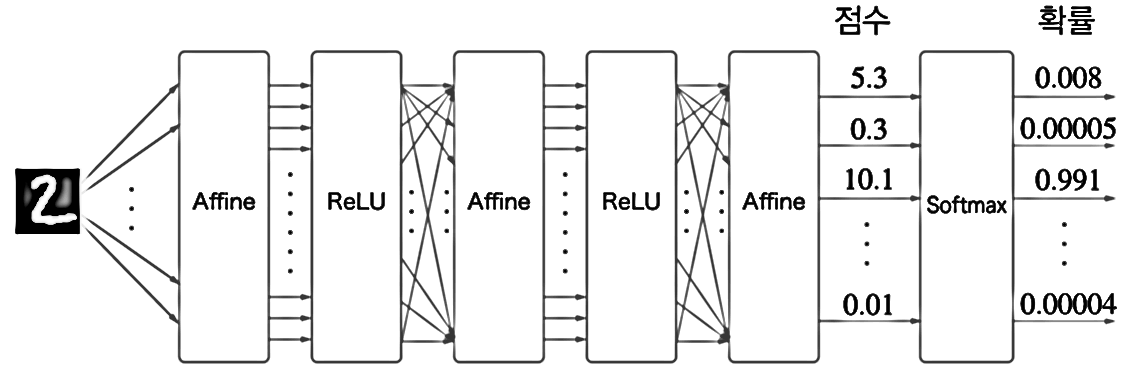

### 5.7.3 오차역전파법으로 구한 기울기 검증하기

#### Gradient Checking (기울기 확인)


- 역전파로 구한 기울기 검증하기
- 수치 미분으로 구한 기울기
    - 느리다
    - 정확하다
- 역전파로 구한 기울기
    - 빠르다
    - 버그 가능성


- 위 두 방식으로 구한 기울기가 일치하는지 확인하는 작업
    - ch05/gradient_check.py

In [27]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

In [28]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [29]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [30]:
x_batch = x_train[:3]
t_batch = t_train[:3]

In [31]:
print(x_batch)
print(x_batch.shape)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(3, 784)


In [32]:
print(t_batch)
print(t_batch.shape)

[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]
(3, 10)


In [33]:
grad_numerical = network.numerical_gradient(x_batch, t_batch)

In [34]:
grad_backprop = network.gradient(x_batch, t_batch)

In [35]:
# 각 가중치의 절대 오차의 평균을 구한다.
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:2.28250835416e-06
b1:1.58438897065e-05
W2:9.58418307933e-13
b2:1.20126129877e-10


### 5.7.4 오차역전파법을 사용한 학습 구현하기

- 기울기를 구할 때 수치 미분이 아닌 역전파법을 사용
    - ch05/train_neuralnet.py

In [36]:
import sys, os
sys.path.append(os.pardir)

import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

In [37]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [38]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [39]:
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

In [40]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [41]:
iter_per_epoch = max(train_size / batch_size, 1)

In [42]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 갱신 # 학습
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key] 
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.16315 0.1721
0.898533333333 0.9046
0.92495 0.9273
0.933766666667 0.9348
0.945833333333 0.9445
0.952466666667 0.9509
0.957566666667 0.955
0.962 0.9575
0.9659 0.9607
0.967583333333 0.9637
0.969866666667 0.9633
0.972516666667 0.9659
0.973866666667 0.9671
0.975733333333 0.967
0.97635 0.9688
0.977633333333 0.969
0.979383333333 0.9698
